In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Copy of CardSortingTask_Analysis_09.28.2023.csv")

df = pd.DataFrame(data)
bias_df = pd.read_csv("MaiaData_CardSort.csv")

df.rename(columns={'SubjectNumber': 'Subject'}, inplace=True)
bias_df['Subject'] = bias_df['Subject'].astype(df['Subject'].dtype)

# Merge the data frames on 'Subject'
df = pd.merge(df, bias_df[['Subject', 'BiasScore']], on='Subject', how='left')

# bias score column
df['Bias'] = np.where((df['BiasScore'] > 0.8) | (df['BiasScore'] < -0.8), 'biased', 'neutral')
df['Abs Bias Score'] = abs(df['BiasScore'])

# Print the merged data frame
df
bias_df
print(df)

                  ExptName             Date   Subject            Block  \
0      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
1      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
2      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
3      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
4      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
...                    ...              ...       ...              ...   
35719  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35720  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35722  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35723  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                Trial Info  SubjectResp  Status    RT  \
0              1   Con_Sym_Heart_Txt_H

In [2]:
incongruent_trial_rows = df[df['Condition'] == 2]
incongruent_trial_rows

,ExptName,Date,Subject,Block,Condition,Trial Info,SubjectResp,Status,RT,SymRespCount,TxtRespCount,IncorrRespCount,BiasScore,Bias,Abs Bias Score
6,WebTask_CardSort_v2,2023-01-31-1745,93f8eaf0,CardSort_Block1,2,Incon_Txt_Heart_Sym_Spade,2,2,508,0,1,0,0.956522,biased,0.956522
11,WebTask_CardSort_v2,2023-01-31-1745,93f8eaf0,CardSort_Block1,2,Incon_Sym_Club_Txt_Heart,2,2,427,0,2,0,0.956522,biased,0.956522
15,WebTask_CardSort_v2,2023-01-31-1745,93f8eaf0,CardSort_Block1,2,Incon_Txt_Spade_Sym_Club,3,2,2820,0,3,0,0.956522,biased,0.956522
18,WebTask_CardSort_v2,2023-01-31-1745,93f8eaf0,CardSort_Block1,2,Incon_Txt_Club_Sum_Heart,1,2,1252,0,4,0,0.956522,biased,0.956522
22,WebTask_CardSort_v2,2023-01-31-1745,93f8eaf0,CardSort_Block1,2,Incon_Sym_Heart_Txt_Spade,3,2,586,0,5,0,0.956522,biased,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35709,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Heart_Txt_Club,2,1,647,37,5,2,-0.782609,neutral,0.782609
35711,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Spade_Txt_Heart,3,1,991,38,5,2,-0.782609,neutral,0.782609
35714,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Spade_Txt_Club,3,1,846,39,5,2,-0.782609,neutral,0.782609
35719,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Txt_Club_Sum_Heart,2,1,791,40,5,2,-0.782609,neutral,0.782609


In [3]:
# Define a function to determine response type
def determine_response(row):
    parts = row['Trial Info'].split('_')
    top_stim = parts[1]  # 'Sym' or 'Txt'
    top_suit = parts[2]  # 'Heart', 'Spade', or 'Club'
    bottom_stim = parts[3]  # 'Sym' or 'Txt'
    bottom_suit = parts[4]  # 'Heart', 'Spade', or 'Club'
    
    suit_to_response = {'Club': 1, 'Heart': 2, 'Spade': 3}
    top_response = suit_to_response.get(top_suit)
    bottom_response = suit_to_response.get(bottom_suit)
    
    if row['SubjectResp'] == top_response:
        return 'top'
    elif row['SubjectResp'] == bottom_response:
        return 'bottom'
    else:
        return 'incorrect'

# Apply the function to each row
incongruent_trial_rows['Response Type'] = incongruent_trial_rows.apply(determine_response, axis=1)

print(incongruent_trial_rows)

                  ExptName             Date   Subject            Block  \
6      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
11     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
15     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
18     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
22     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
...                    ...              ...       ...              ...   
35709  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35711  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35714  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35719  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                 Trial Info  SubjectResp  Status    RT  \
6              2  Incon_Txt_Heart_Sym

/tmp/ipykernel_334/1113856178.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Response Type'] = incongruent_trial_rows.apply(determine_response, axis=1)


In [4]:
# Calculate total responses per subject for normalization
total_responses = incongruent_trial_rows.groupby('Subject')['Response Type'].transform('size')

# Calculate top responses per subject
top_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'top'].groupby('Subject')['Response Type'].transform('size')
# Reindex to match the original DataFrame and fill missing values with 0
incongruent_trial_rows['Top Proportion'] = (top_responses.reindex(incongruent_trial_rows.index, fill_value=0) / total_responses).fillna(0)

# Calculate bottom responses per subject
bottom_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'bottom'].groupby('Subject')['Response Type'].transform('size')
# Reindex to match the original DataFrame and fill missing values with 0
incongruent_trial_rows['Bottom Proportion'] = (bottom_responses.reindex(incongruent_trial_rows.index, fill_value=0) / total_responses).fillna(0)
print(incongruent_trial_rows)

                  ExptName             Date   Subject            Block  \
6      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
11     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
15     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
18     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
22     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
...                    ...              ...       ...              ...   
35709  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35711  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35714  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35719  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                 Trial Info  SubjectResp  Status    RT  \
6              2  Incon_Txt_Heart_Sym

/tmp/ipykernel_334/543034550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Top Proportion'] = (top_responses.reindex(incongruent_trial_rows.index, fill_value=0) / total_responses).fillna(0)
/tmp/ipykernel_334/543034550.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Bottom Proportion'] = (bottom_responses.reindex(incongruent_trial_rows.index, fill_value=0) / total_responses).fillna(0)


In [5]:
incongruent_trial_rows['Top Proportion'] = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'top'].groupby('Subject')['Response Type'].transform('size') / incongruent_trial_rows.groupby('Subject')['Response Type'].transform('size')

# Calculate the proportion of 'bottom' choices for each subject
incongruent_trial_rows['Bottom Proportion'] = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'bottom'].groupby('Subject')['Response Type'].transform('size') / incongruent_trial_rows.groupby('Subject')['Response Type'].transform('size')

# Calculate 'Bottom Proportion' as 1 minus 'Top Proportion' where 'Bottom Proportion' is NaN
incongruent_trial_rows.loc[incongruent_trial_rows['Bottom Proportion'].isna(), 'Bottom Proportion'] = 1 - incongruent_trial_rows['Top Proportion']

# Calculate 'Top Proportion' as 1 minus 'Bottom Proportion' where 'Top Proportion' is NaN
incongruent_trial_rows.loc[incongruent_trial_rows['Top Proportion'].isna(), 'Top Proportion'] = 1 - incongruent_trial_rows['Bottom Proportion']


print(incongruent_trial_rows)

biased_df = incongruent_trial_rows[incongruent_trial_rows['Bias'] == 'biased']
neutral_df = incongruent_trial_rows[incongruent_trial_rows['Bias'] == 'neutral']
neutral_df

                  ExptName             Date   Subject            Block  \
6      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
11     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
15     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
18     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
22     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
...                    ...              ...       ...              ...   
35709  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35711  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35714  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35719  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                 Trial Info  SubjectResp  Status    RT  \
6              2  Incon_Txt_Heart_Sym

/tmp/ipykernel_334/714193067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Top Proportion'] = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'top'].groupby('Subject')['Response Type'].transform('size') / incongruent_trial_rows.groupby('Subject')['Response Type'].transform('size')
/tmp/ipykernel_334/714193067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Bottom Proportion'] = incongruent_trial_rows[incongruent_trial_rows['Response

,ExptName,Date,Subject,Block,Condition,Trial Info,SubjectResp,Status,RT,SymRespCount,TxtRespCount,IncorrRespCount,BiasScore,Bias,Abs Bias Score,Response Type,Top Proportion,Bottom Proportion
978,WebTask_CardSort_v2,2023-02-06-2050,9c2294e3,CardSort_Block1,2,Incon_Txt_Heart_Sym_Spade,2,2,780,0,1,0,-0.063830,neutral,0.063830,top,0.854167,0.145833
983,WebTask_CardSort_v2,2023-02-06-2050,9c2294e3,CardSort_Block1,2,Incon_Sym_Club_Txt_Heart,1,1,963,1,1,0,-0.063830,neutral,0.063830,top,0.854167,0.145833
987,WebTask_CardSort_v2,2023-02-06-2050,9c2294e3,CardSort_Block1,2,Incon_Txt_Spade_Sym_Club,3,2,732,1,2,0,-0.063830,neutral,0.063830,top,0.854167,0.145833
990,WebTask_CardSort_v2,2023-02-06-2050,9c2294e3,CardSort_Block1,2,Incon_Txt_Club_Sum_Heart,2,1,2759,2,2,0,-0.063830,neutral,0.063830,bottom,0.875000,0.125000
994,WebTask_CardSort_v2,2023-02-06-2050,9c2294e3,CardSort_Block1,2,Incon_Sym_Heart_Txt_Spade,1,3,3000,2,2,1,-0.063830,neutral,0.063830,incorrect,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35709,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Heart_Txt_Club,2,1,647,37,5,2,-0.782609,neutral,0.782609,top,0.520833,0.479167
35711,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Spade_Txt_Heart,3,1,991,38,5,2,-0.782609,neutral,0.782609,top,0.520833,0.479167
35714,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Sym_Spade_Txt_Club,3,1,846,39,5,2,-0.782609,neutral,0.782609,top,0.520833,0.479167
35719,WebTask_CardSort_v2,2023-09-25-1914,297c34a5,CardSort_Block4,2,Incon_Txt_Club_Sum_Heart,2,1,791,40,5,2,-0.782609,neutral,0.782609,bottom,0.562500,0.437500


/tmp/ipykernel_334/4034628674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bias', y='Top Proportion', data=incongruent_trial_rows, ax=axes[0], palette='Set2')
/tmp/ipykernel_334/4034628674.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bias', y='Bottom Proportion', data=incongruent_trial_rows, ax=axes[1], palette='Set2')


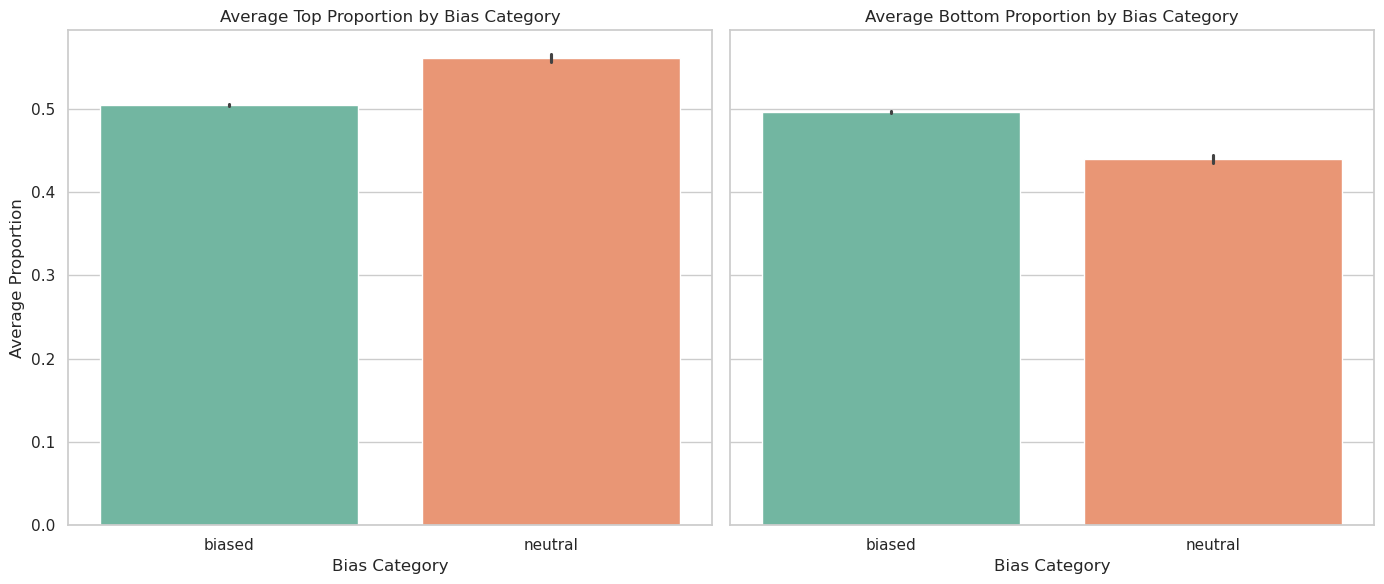

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the average top proportion for each bias category
sns.barplot(x='Bias', y='Top Proportion', data=incongruent_trial_rows, ax=axes[0], palette='Set2')
axes[0].set_title('Average Top Proportion by Bias Category')
axes[0].set_ylabel('Average Proportion')
axes[0].set_xlabel('Bias Category')

# Plotting the average bottom proportion for each bias category
sns.barplot(x='Bias', y='Bottom Proportion', data=incongruent_trial_rows, ax=axes[1], palette='Set2')
axes[1].set_title('Average Bottom Proportion by Bias Category')
axes[1].set_ylabel('Average Proportion')
axes[1].set_xlabel('Bias Category')

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
biased_df = incongruent_trial_rows[incongruent_trial_rows['Bias'] == 'biased']
neutral_df = incongruent_trial_rows[incongruent_trial_rows['Bias'] == 'neutral']
print(neutral_df.drop_duplicates(subset='Subject', keep='last'))
neutral_df_unique=neutral_df.drop_duplicates(subset='Subject', keep='last')
biased_df_unique=biased_df.drop_duplicates(subset='Subject', keep='last')

                  ExptName             Date   Subject            Block  \
1161   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block4   
1353   WebTask_CardSort_v2  2023-02-07-1642  9267045e  CardSort_Block4   
1737   WebTask_CardSort_v2  2023-02-08-1750  1c4f7ffb  CardSort_Block4   
2121   WebTask_CardSort_v2  2023-02-10-0627  c3224966  CardSort_Block4   
2313   WebTask_CardSort_v2  2023-02-10-1440  b5a17561  CardSort_Block4   
...                    ...              ...       ...              ...   
33801  WebTask_CardSort_v2  2023-08-28-1833  2dc7132a  CardSort_Block4   
34185  WebTask_CardSort_v2  2023-09-01-1710  c6dec119  CardSort_Block4   
34761  WebTask_CardSort_v2  2023-09-12-2254  0156ce12  CardSort_Block4   
35529  WebTask_CardSort_v2  2023-09-20-1803  bad632c6  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                Trial Info  SubjectResp  Status    RT  \
1161           2  Incon_Sym_Club_Txt_H

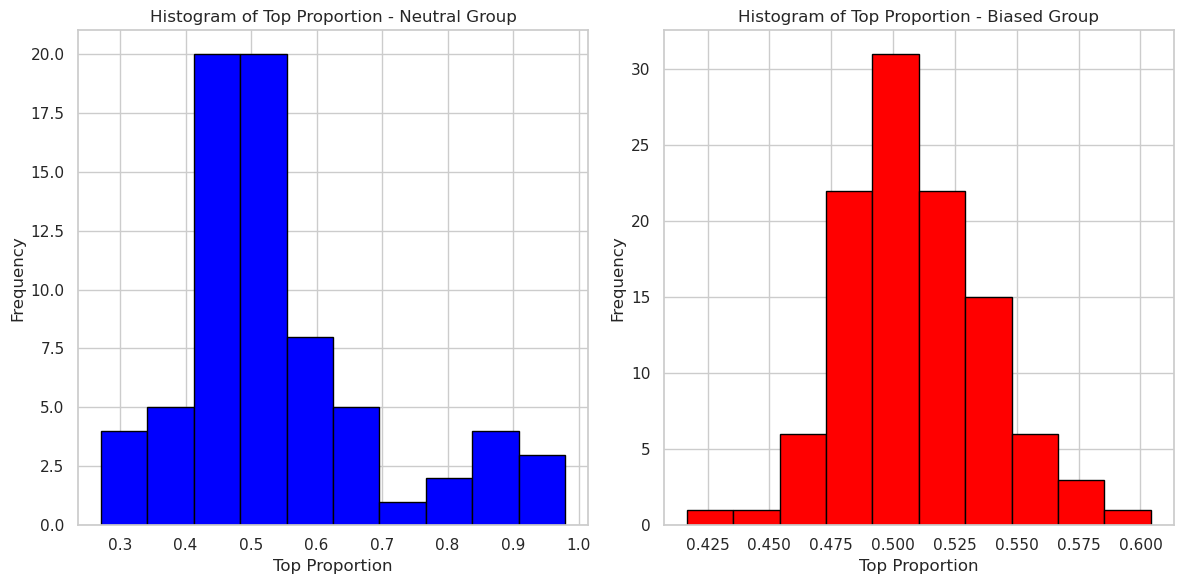

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histograms for each group's top proportion
plt.figure(figsize=(12, 6))

# Histogram for the neutral group
plt.subplot(1, 2, 1)
plt.hist(neutral_df_unique['Top Proportion'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Top Proportion - Neutral Group')
plt.xlabel('Top Proportion')
plt.ylabel('Frequency')

# Histogram for the biased group
plt.subplot(1, 2, 2)
plt.hist(biased_df_unique['Top Proportion'], bins=10, color='red', edgecolor='black')
plt.title('Histogram of Top Proportion - Biased Group')
plt.xlabel('Top Proportion')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()


In [9]:
len(biased_df["Subject"].unique())+len(neutral_df["Subject"].unique())



186

In [10]:
from scipy.stats import ttest_ind
prop_biased = biased_df["Top Proportion"]
prop_neutral = neutral_df["Top Proportion"]

t_stat, p_value = ttest_ind(prop_biased,prop_neutral, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

prop_biased = biased_df["Bottom Proportion"]
prop_neutral = neutral_df["Bottom Proportion"]

t_stat, p_value = ttest_ind(prop_biased,prop_neutral, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -26.80635067998918
P-value: 4.45728439115145e-152
T-statistic: 26.806350679989155
P-value: 4.457284391153987e-152


In [11]:
print(biased_df["Top Proportion"])
print(neutral_df["Top Proportion"])

6        0.437500
11       0.479167
15       0.437500
18       0.437500
22       0.479167
           ...   
35325    0.479167
35327    0.479167
35330    0.479167
35335    0.479167
35337    0.479167
Name: Top Proportion, Length: 5232, dtype: float64
978      0.854167
983      0.854167
987      0.854167
990      0.875000
994           NaN
           ...   
35709    0.520833
35711    0.520833
35714    0.520833
35719    0.562500
35721    0.520833
Name: Top Proportion, Length: 3696, dtype: float64


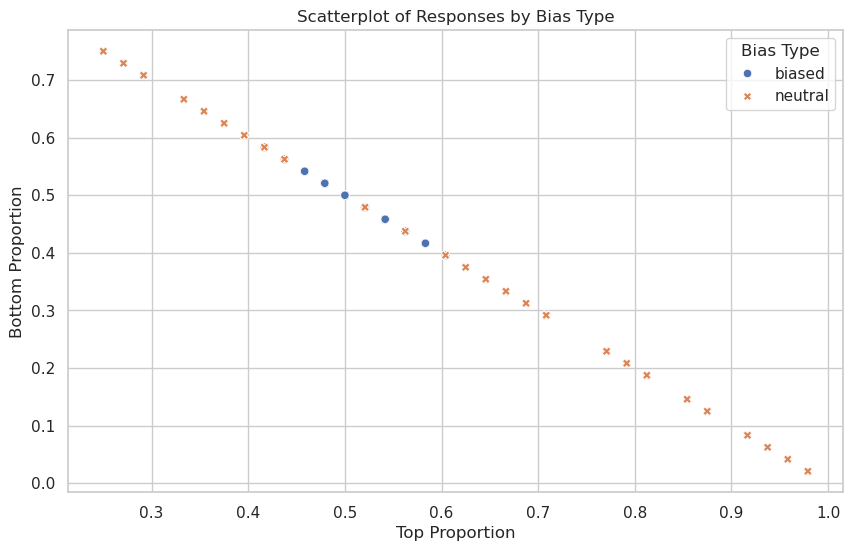

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=incongruent_trial_rows, x='Top Proportion', y='Bottom Proportion', hue='Bias', style='Bias')
scatter_plot.set_title('Scatterplot of Responses by Bias Type')
scatter_plot.set_xlabel('Top Proportion')
scatter_plot.set_ylabel('Bottom Proportion')
plt.legend(title='Bias Type')
plt.show()


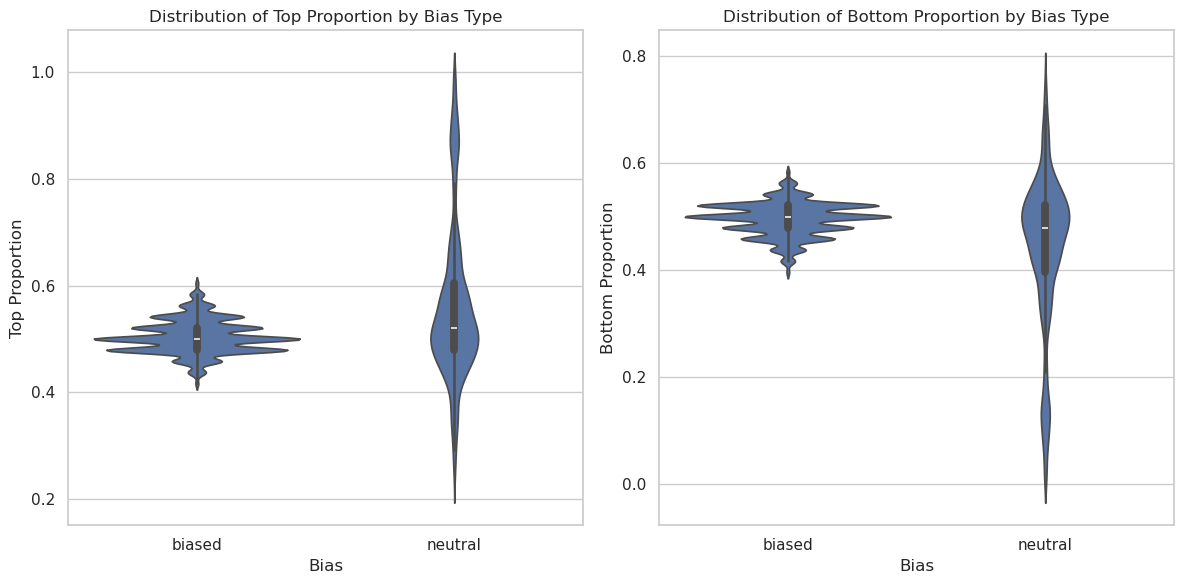

In [13]:
# Create Violin Plots for distribution analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Bias', y='Top Proportion', data=incongruent_trial_rows)
plt.title('Distribution of Top Proportion by Bias Type')

plt.subplot(1, 2, 2)
sns.violinplot(x='Bias', y='Bottom Proportion', data=incongruent_trial_rows)
plt.title('Distribution of Bottom Proportion by Bias Type')

plt.tight_layout()
plt.show()


In [14]:
print(incongruent_trial_rows)

                  ExptName             Date   Subject            Block  \
6      WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
11     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
15     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
18     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
22     WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1   
...                    ...              ...       ...              ...   
35709  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35711  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35714  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35719  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
35721  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

       Condition                 Trial Info  SubjectResp  Status    RT  \
6              2  Incon_Txt_Heart_Sym

              ExptName             Date   Subject            Block  Condition  \
0  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
1  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
2  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
3  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
4  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   

                  Trial Info  SubjectResp  Status    RT  SymRespCount  ...  \
0  Incon_Txt_Heart_Sym_Spade            2       2   508             0  ...   
1   Incon_Sym_Club_Txt_Heart            2       2   427             0  ...   
2   Incon_Txt_Spade_Sym_Club            3       2  2820             0  ...   
3   Incon_Txt_Club_Sum_Heart            1       2  1252             0  ...   
4  Incon_Sym_Heart_Txt_Spade            3       2   586             0  ...   

   BiasScore    Bias  Abs Bias Score Respons

/tmp/ipykernel_334/4220278720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incongruent_trial_rows['Total_Incongruent_Trials'] = (


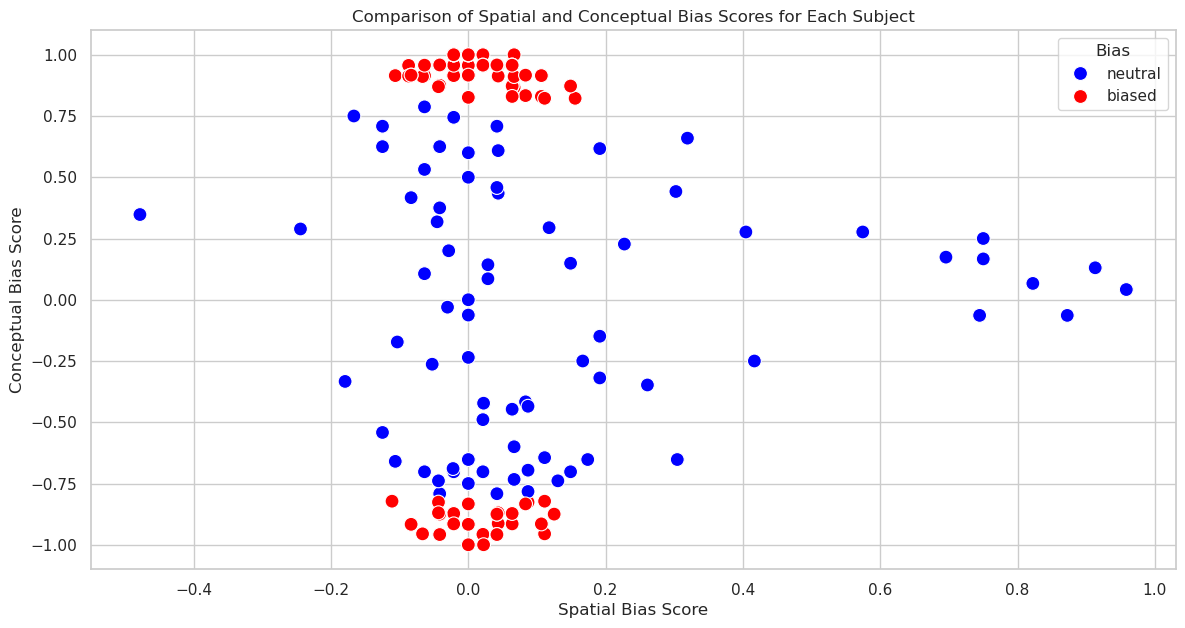

In [15]:
# Assuming 'incongruent_trial_rows' contains the biased_or_neutral information
# Create a column for the total incongruent trials
incongruent_trial_rows['Total_Incongruent_Trials'] = (
    incongruent_trial_rows['SymRespCount'] +
    incongruent_trial_rows['TxtRespCount'] -
    incongruent_trial_rows['IncorrRespCount']
)

# Calculate the number of top and bottom responses for each participant
top_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'top'].groupby('Subject').size()
bottom_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'bottom'].groupby('Subject').size()

# Merge the top and bottom responses back into the original dataframe
df_top = top_responses.reset_index(name='Top_Responses')
df_bottom = bottom_responses.reset_index(name='Bottom_Responses')

df = incongruent_trial_rows.merge(df_top, on='Subject', how='left').merge(df_bottom, on='Subject', how='left').fillna(0)

df = df[df['Response Type'] != 'incorrect']

df['Spatial_Bias_Score'] = (df['Top_Responses'] - df['Bottom_Responses']) / (df['Top_Responses'] + df['Bottom_Responses'])

# Fill NaN values with 0
df['Spatial_Bias_Score'] = df['Spatial_Bias_Score'].fillna(0)

print(df.head())

# Create the avg_scores DataFrame
avg_scores = df.groupby('Subject')[['Spatial_Bias_Score', 'BiasScore']].mean().reset_index()

# Add the biased_or_neutral information to avg_scores
# Assuming 'biased_or_neutral' is a column in the original df
avg_scores = avg_scores.merge(df[['Subject', 'Bias']].drop_duplicates(), on='Subject', how='left')

# Set the style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 7))

# Scatter plot with hue
sns.scatterplot(
    x='Spatial_Bias_Score', 
    y='BiasScore', 
    data=avg_scores, 
    hue='Bias', 
    palette={'biased': 'red', 'neutral': 'blue'}, 
    s=100
)

# Adding labels and title
plt.xlabel('Spatial Bias Score')
plt.ylabel('Conceptual Bias Score')
plt.title('Comparison of Spatial and Conceptual Bias Scores for Each Subject')

# Display the plot
plt.show()


              ExptName             Date   Subject            Block  Condition  \
0  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
1  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
2  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
3  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   
4  WebTask_CardSort_v2  2023-01-31-1745  93f8eaf0  CardSort_Block1          2   

                  Trial Info  SubjectResp  Status    RT  SymRespCount  ...  \
0  Incon_Txt_Heart_Sym_Spade            2       2   508             0  ...   
1   Incon_Sym_Club_Txt_Heart            2       2   427             0  ...   
2   Incon_Txt_Spade_Sym_Club            3       2  2820             0  ...   
3   Incon_Txt_Club_Sum_Heart            1       2  1252             0  ...   
4  Incon_Sym_Heart_Txt_Spade            3       2   586             0  ...   

   BiasScore    Bias  Abs Bias Score Respons

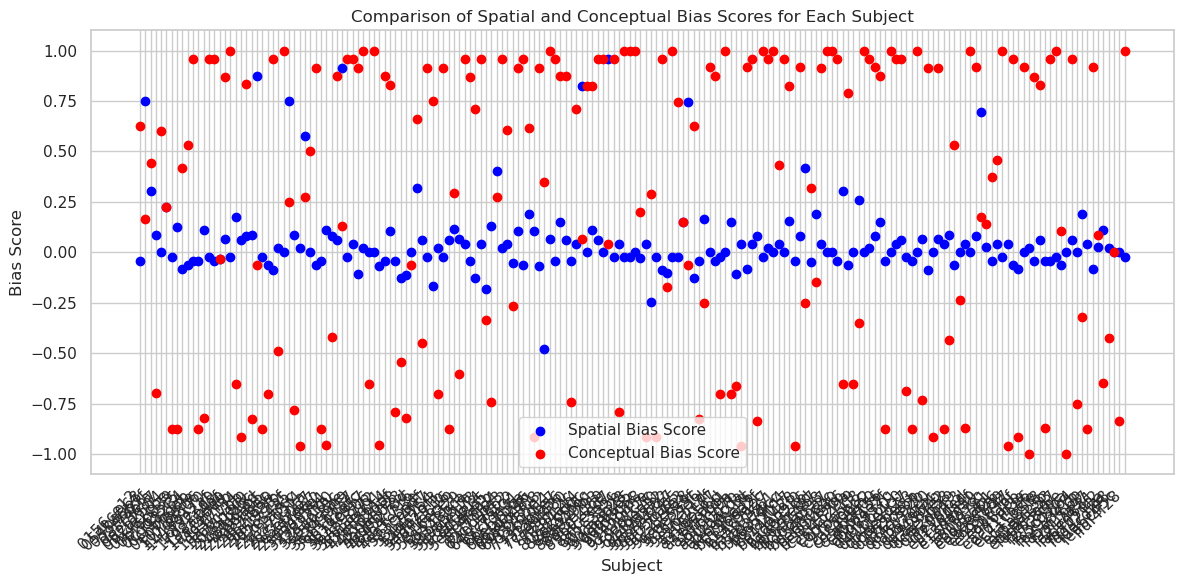

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


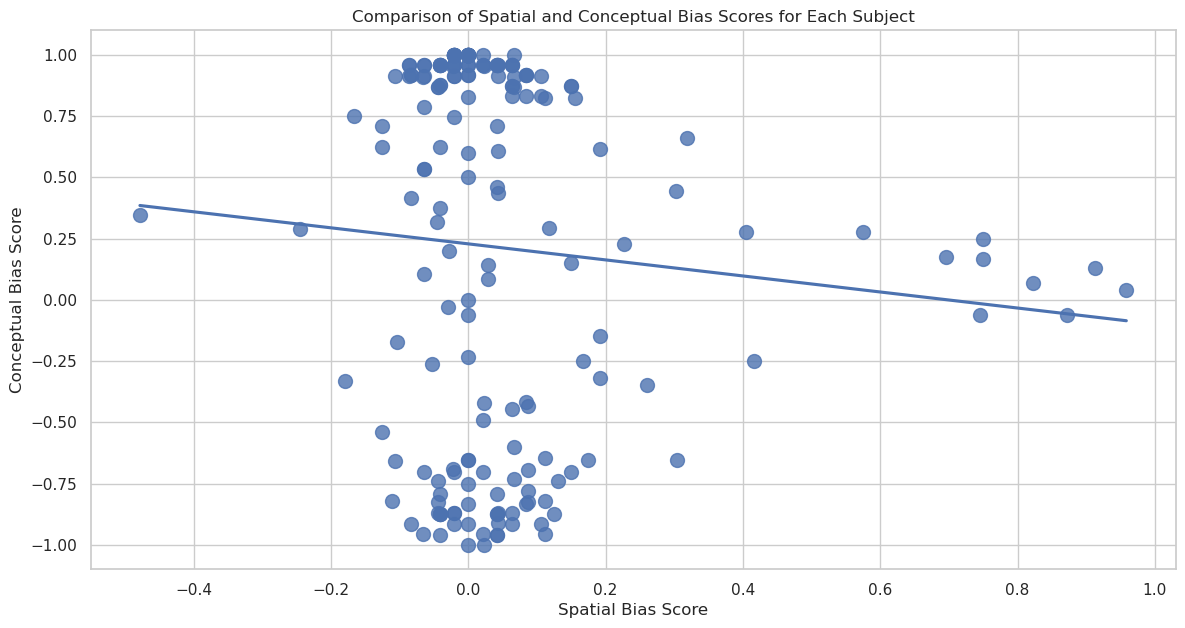

In [16]:
incongruent_trial_rows['Total_Incongruent_Trials'] = incongruent_trial_rows['SymRespCount'] + incongruent_trial_rows['TxtRespCount'] - incongruent_trial_rows['IncorrRespCount']

# Calculate the number of top and bottom responses for each participant
top_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'top'].groupby('Subject').size()
bottom_responses = incongruent_trial_rows[incongruent_trial_rows['Response Type'] == 'bottom'].groupby('Subject').size()

# Merge the top and bottom responses back into the original dataframe
df_top = top_responses.reset_index(name='Top_Responses')
df_bottom = bottom_responses.reset_index(name='Bottom_Responses')

df = incongruent_trial_rows.merge(df_top, on='Subject', how='left').merge(df_bottom, on='Subject', how='left').fillna(0)

# Calculate the spatial bias score
df['Spatial_Bias_Score'] = (df['Top_Responses'] - df['Bottom_Responses']) / (df['Top_Responses'] + df['Bottom_Responses'])

# Fill NaN values with 0
df['Spatial_Bias_Score'] = df['Spatial_Bias_Score'].fillna(0)

print(df.head())




avg_scores = df.groupby('Subject')[['Spatial_Bias_Score', 'BiasScore']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for spatial bias scores
plt.scatter(avg_scores['Subject'], avg_scores['Spatial_Bias_Score'], color='blue', label='Spatial Bias Score')

# Scatter plot for conceptual bias scores
plt.scatter(avg_scores['Subject'], avg_scores['BiasScore'], color='red', label='Conceptual Bias Score')

# Adding labels and title
plt.xlabel('Subject')
plt.ylabel('Bias Score')
plt.title('Comparison of Spatial and Conceptual Bias Scores for Each Subject')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



avg_scores = df.groupby('Subject')[['Spatial_Bias_Score', 'BiasScore']].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 7))

# Scatter plot with a best fit line
sns.regplot(x='Spatial_Bias_Score', y='BiasScore', data=avg_scores, ci=None, scatter_kws={'s': 100})

# Adding labels and title
plt.xlabel('Spatial Bias Score')
plt.ylabel('Conceptual Bias Score')
plt.title('Comparison of Spatial and Conceptual Bias Scores for Each Subject')

# Hide the legend
plt.legend().set_visible(False)

# Display the plot
plt.show()

                 ExptName             Date   Subject            Block  \
240   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block1   
241   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block1   
242   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block1   
243   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block1   
245   WebTask_CardSort_v2  2023-02-06-2050  9c2294e3  CardSort_Block1   
...                   ...              ...       ...              ...   
8923  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
8924  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
8925  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
8926  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   
8927  WebTask_CardSort_v2  2023-09-25-1914  297c34a5  CardSort_Block4   

      Condition                 Trial Info  SubjectResp  Status    RT  \
240           2  Incon_Txt_Heart_Sym_Spade        

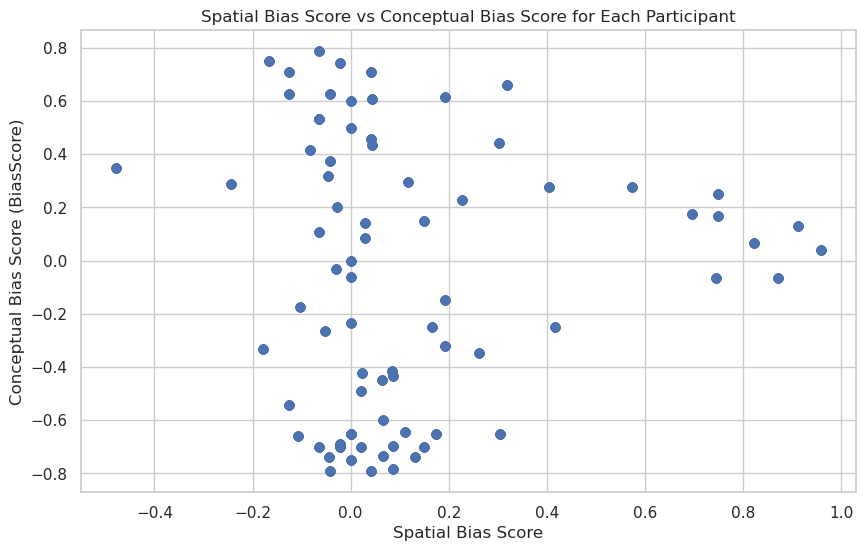

186
T-statistic: -2.702360624084814
P-value: 0.007202065547054158


In [17]:
df = df[df['Response Type'] != 'incorrect']
neutral_group = df[df['Bias'] == 'neutral']
print(neutral_group)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(neutral_group['Spatial_Bias_Score'], neutral_group['BiasScore'])
plt.xlabel('Spatial Bias Score')
plt.ylabel('Conceptual Bias Score (BiasScore)')
plt.title('Spatial Bias Score vs Conceptual Bias Score for Each Participant')
plt.grid(True)
plt.show()

last_rows_df = df.groupby('Subject').tail(1)
print(len(last_rows_df['Subject']))

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(last_rows_df['Spatial_Bias_Score'],last_rows_df['BiasScore'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [18]:
import os

# Specify the directory containing the text files
directory = '/home/jovyan/malayka_data'  # Change this to your directory

# Create an empty list to store the data
data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Process only text files
        subject_number = filename.split('.')[3].split('-')[0]  # Extract subject number
        
        # Full path to the file
        file_path = os.path.join(directory, filename)
        
        # Open and read the file
        with open(file_path, 'r') as file:
            trial_number = 0
            for line in file:
                trial_number += 1
                parts = line.strip().split()
                reaction_time = int(parts[-4])  # Reaction time is the fourth last element
                data.append({
                    'Subject': subject_number,
                    'Trial': trial_number,
                    'ReactionTime': reaction_time
                })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Subject,Trial,ReactionTime
0,cd51fc02,1,1019
1,cd51fc02,2,779
2,cd51fc02,3,695
3,cd51fc02,4,697
4,cd51fc02,5,667
...,...,...,...
11951,49303bf9,192,757
11952,49303bf9,193,662
11953,49303bf9,194,913
11954,49303bf9,195,647


### Malayka Data Join

In [19]:
parc_cardsort = pd.read_csv("/home/jovyan/malayka_data/CardSort_Summary_withID.csv")
parc_demographics = pd.read_csv("/home/jovyan/malayka_data/Demographics_Summary(in).csv")
merged_parc = pd.merge(parc_cardsort, parc_demographics, on='Subject')
merged_parc= merged_parc.rename(columns={'Language_ClassificationDemo': 'LangClassification'})
merged_parc.head()

,Id,SymRespCount,TxtRespCount,IncorrRespCount,Subject,IRQ_visual,IRQ_verbal,IRQ_visual_code,IRQ_verbal_code,VerbalBiasScore,Age,Sex,LangClassification,L1,Handedness
0,02f372d4-ba47-4758-a87e-a334515f2a42,5,38,5,1629.0,3.166667,2.714286,2.0,3.0,0.767442,23,Female,Late Bilingual,Chinese,Right
1,04589e2b-5afa-4581-80ae-986099cbad98,42,4,2,1624.0,3.583333,3.928571,2.0,3.0,-0.826087,24,Female,Early Bilingual,Mandarin,Right
2,0d8c96eb-28ca-4082-9e89-23628014c5b9,27,12,9,1612.0,4.250000,4.142857,3.5,3.0,-0.384615,22,Female,Late Bilingual,Mandarin,Right
3,119fa496-b96f-4c64-857a-8228a21a2079,0,46,2,1630.0,3.666667,4.642857,4.0,4.0,1.000000,20,Female,Monolingual,English,Right
4,151cfad6-a8d2-4f35-96d5-827a2f939245,3,45,0,1634.0,2.916667,3.857143,3.0,3.0,0.875000,28,Male,Early Bilingual,English,Right


In [20]:
maia_demographics = pd.read_csv("malayka_data/MaiaData_Demographics.csv")
columns_to_remove = ['ExptName', 'Date','Country', 'Age', 'Sex', 'Gender', 'Ethnicity', 'Race', 'Education']
maia_demographics= maia_demographics.drop(columns=columns_to_remove)
maia_demographics = maia_demographics.rename(columns={'SubjectNumber': 'Subject'})
maia_demographics['Subject'] = maia_demographics['Subject'].astype(str)
bias_df['Subject'] = bias_df['Subject'].astype(str)
bias_df = bias_df.rename(columns={'IncorRespCount': 'IncorrRespCount'})
merged_maia = pd.merge(bias_df, maia_demographics, on='Subject')
merged_maia = merged_maia.drop(columns=["Con_RT", "InCon_RT", "Incon-ConRT"])

In [21]:
merged_maia['L1'] = merged_maia.apply(lambda row: 'English' if row['NativeEnglish'] == 1 else row['WhatSecLang'], axis=1)
lang_classification_mapping = {
    1: 'Monolingual',
    2: 'Early Bilingual',
    3: 'Late Bilingual',
    4: 'None of the above'
}

# Replace the LangClassification values based on the mapping
merged_maia['LangClassification'] = merged_maia['LangClassification'].map(lang_classification_mapping)
merged_maia

,Subject,Age,Sex,IncorrRespCount,SymRespCount,TxtRespCount,BiasScore,NativeEnglish,SecondLang,WhatSecLang,LangClassification,Handedness,L1
0,0156ce12,51.0,2.0,0,9,39,0.625000,1,2,NaN,Monolingual,80.00,English
1,054ba968,87.0,2.0,0,20,28,0.166667,1,2,NaN,Monolingual,100.00,English
2,05546b7f,60.0,2.0,5,12,31,0.441860,1,1,French,Monolingual,86.67,English
3,08f746fa,38.0,2.0,2,39,7,-0.695652,2,1,German,Late Bilingual,100.00,German
4,0aef8687,63.0,2.0,8,8,32,0.600000,2,1,Chinese,Monolingual,100.00,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,fade4881,59.0,2.0,13,16,19,0.085714,1,2,NaN,Monolingual,100.00,English
180,fb705df2,18.0,2.0,3,37,8,-0.644444,1,2,NaN,Monolingual,100.00,English
181,fdd4712a,41.0,2.0,3,32,13,-0.422222,1,2,NaN,Monolingual,50.00,English
182,feabc45c,33.0,2.0,0,44,4,-0.833333,1,2,NaN,Monolingual,-75.00,English


In [22]:
#merged_maia['Subject'] = merged_maia['Subject'].astype(str)
#merged_parc['Subject'] = merged_parc['Subject'].astype(str)
common_columns = merged_parc.columns.intersection(merged_maia.columns)
parc_common = merged_parc[common_columns]
maia_common= merged_maia[common_columns]
data = pd.concat([parc_common, maia_common], axis=0, ignore_index=True)
data['Bias Score'] = (data['TxtRespCount'] - data['SymRespCount']) / (48 - data['IncorrRespCount'])
data


,SymRespCount,TxtRespCount,IncorrRespCount,Subject,Age,Sex,LangClassification,L1,Handedness,Bias Score
0,5,38,5,1629.0,23.0,Female,Late Bilingual,Chinese,Right,0.767442
1,42,4,2,1624.0,24.0,Female,Early Bilingual,Mandarin,Right,-0.826087
2,27,12,9,1612.0,22.0,Female,Late Bilingual,Mandarin,Right,-0.384615
3,0,46,2,1630.0,20.0,Female,Monolingual,English,Right,1.000000
4,3,45,0,1634.0,28.0,Male,Early Bilingual,English,Right,0.875000
...,...,...,...,...,...,...,...,...,...,...
228,16,19,13,fade4881,59.0,2.0,Monolingual,English,100.0,0.085714
229,37,8,3,fb705df2,18.0,2.0,Monolingual,English,100.0,-0.644444
230,32,13,3,fdd4712a,41.0,2.0,Monolingual,English,50.0,-0.422222
231,44,4,0,feabc45c,33.0,2.0,Monolingual,English,-75.0,-0.833333


## Demographics

In [23]:
monolinguals = (data["LangClassification"] == "Monolingual").sum()
bilinguals = (data["LangClassification"] != "Monolingual").sum()
EFL = (data["L1"] == "English").sum()
not_EFL = (data["L1"] != "English").sum()
print("Monolingual Count:", monolinguals)
print("Bilingual Count:", bilinguals)
print("English L1 Count:", EFL)
print("Other L1 Count:", not_EFL)

Monolingual Count: 123
Bilingual Count: 110
English L1 Count: 173
Other L1 Count: 60


Text(0, 0.5, 'Count')

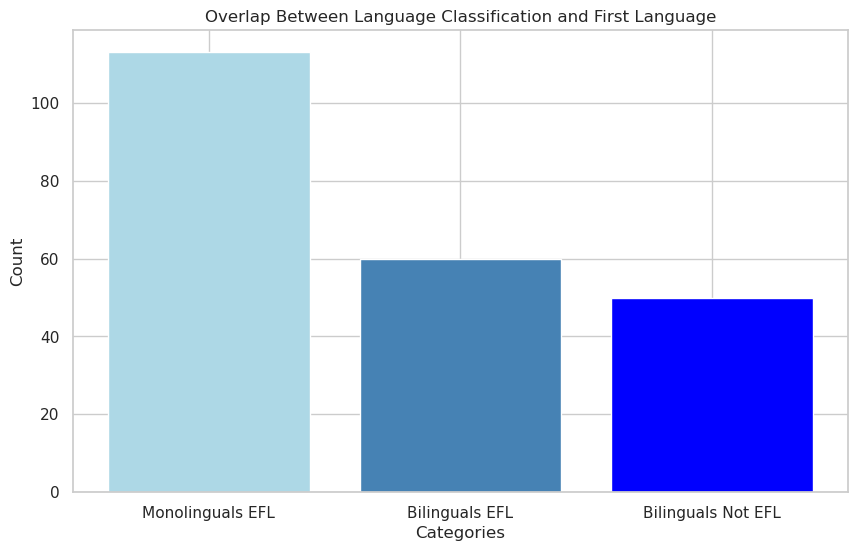

In [24]:
bilinguals_efl = ((data["LangClassification"] != "Monolingual") & (data["L1"] == "English")).sum()
bilinguals_not_efl = ((data["LangClassification"] != "Monolingual") & (data["L1"] != "English")).sum()
monolinguals_efl = ((data["LangClassification"] == "Monolingual") & (data["L1"] == "English")).sum()

categories = ['Monolinguals EFL', 'Bilinguals EFL', 'Bilinguals Not EFL']
counts = [monolinguals_efl, bilinguals_efl, bilinguals_not_efl]
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['#add8e6', '#4682b4', '#0000ff'])

# Adding titles and labels
plt.title('Overlap Between Language Classification and First Language')
plt.xlabel('Categories')
plt.ylabel('Count')

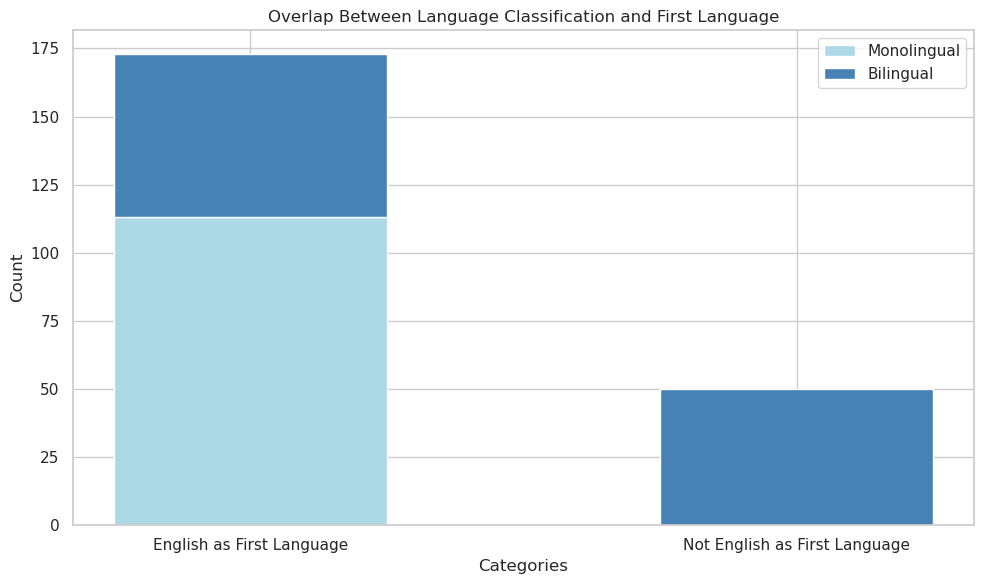

In [25]:
categories = ['English as First Language', 'Not English as First Language']
monolingual_counts = [monolinguals_efl, 0]  # Assuming no monolinguals with Not English as First Language
bilingual_counts = [bilinguals_efl, bilinguals_not_efl]

bar_width = 0.5

# Layered bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
p1 = ax.bar(categories, monolingual_counts, bar_width, label='Monolingual', color='#add8e6')
p2 = ax.bar(categories, bilingual_counts, bar_width, bottom=monolingual_counts, label='Bilingual', color='#4682b4')

# Adding titles and labels
ax.set_title('Overlap Between Language Classification and First Language')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.legend()

plt.tight_layout()
plt.show()


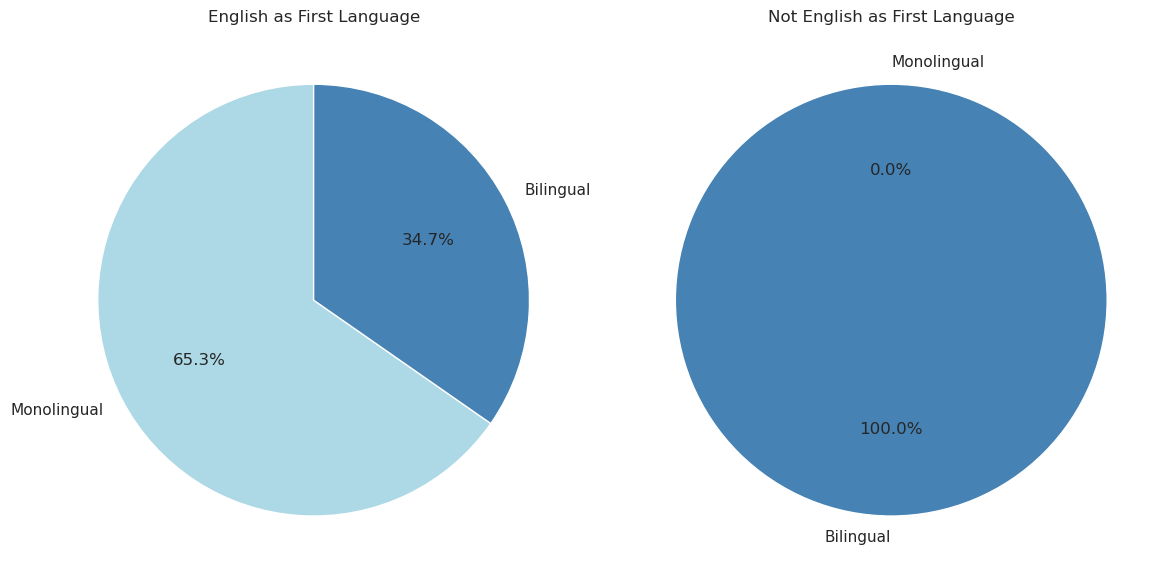

In [26]:
# Data for pie charts
labels_efl = ['Monolingual', 'Bilingual']
sizes_efl = [monolinguals_efl, bilinguals_efl]
colors_efl = ['#add8e6', '#4682b4']

labels_not_efl = ['Monolingual', 'Bilingual']
sizes_not_efl = [0, bilinguals_not_efl]  # Monolinguals Not EFL is assumed to be 0 based on your code
colors_not_efl = ['#add8e6', '#4682b4']

# Create subplots for two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for EFL
ax1.pie(sizes_efl, labels=labels_efl, colors=colors_efl, autopct='%1.1f%%', startangle=90)
ax1.set_title('English as First Language')

# Pie chart for Not EFL
ax2.pie(sizes_not_efl, labels=labels_not_efl, colors=colors_not_efl, autopct='%1.1f%%', startangle=90)
ax2.set_title('Not English as First Language')

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame 'data' with columns 'LangClassification' and 'L1'

# Create a contingency table
contingency_table = pd.crosstab(data['LangClassification'], data['L1'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

# Check if the p-value is below a significance level (e.g., 0.05)
if p < 0.05:
    print("There is a significant association between Language Classification and First Language.")
else:
    print("There is no significant association between Language Classification and First Language.")


Chi-Square Statistic: 163.55631744947857
Degrees of Freedom: 99
P-Value: 4.821486621320871e-05
There is a significant association between Language Classification and First Language.


In [28]:
data[data['Bias Score']>1.0]


,SymRespCount,TxtRespCount,IncorrRespCount,Subject,Age,Sex,LangClassification,L1,Handedness,Bias Score


In [29]:
data[(data["LangClassification"] == "Monolingual") & (data["L1"] != "English")]


,SymRespCount,TxtRespCount,IncorrRespCount,Subject,Age,Sex,LangClassification,L1,Handedness,Bias Score
8,19,27,2,1611.0,21.0,Male,Monolingual,Chinese,Left,0.173913
53,8,32,8,0aef8687,63.0,2.0,Monolingual,Chinese,100.0,0.600000
78,41,5,2,297c34a5,44.0,2.0,Monolingual,Korean (but no longer speaking),64.71,-0.782609
87,20,26,2,335d619c,25.0,2.0,Monolingual,NaN,66.67,0.130435
134,4,41,3,86655f6c,29.0,2.0,Monolingual,Portugues,40.0,0.822222
141,0,47,1,90caab28,32.0,1.0,Monolingual,"German native, basic French, a little Italian",-89.47,1.000000
150,20,27,1,99056ad5,66.0,2.0,Monolingual,Spanish,100.0,0.148936
198,2,43,3,d9a70fac,63.0,2.0,Monolingual,chinese,90.0,0.911111
227,2,46,0,fa217a97,70.0,1.0,Monolingual,Vietnamese,100.0,0.916667
232,0,47,1,ffdf4f28,30.0,2.0,Monolingual,NaN,100.0,1.000000


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11956,) and arg 1 with shape (233,).

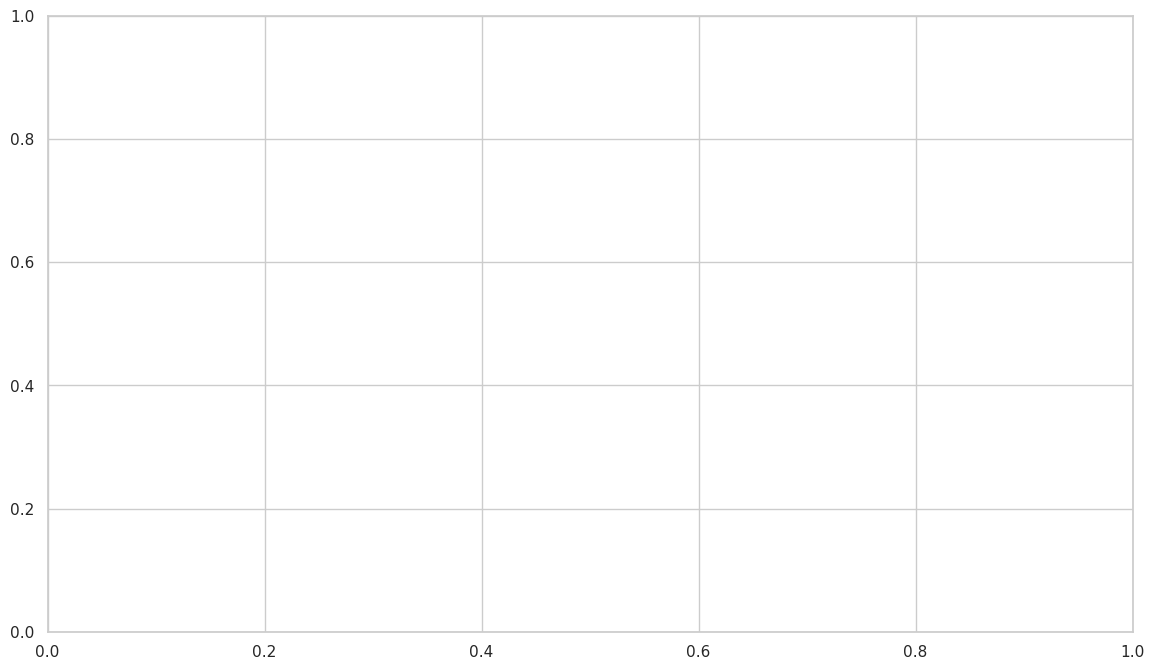

In [30]:
colors = data['L1'].apply(lambda x: 'blue' if x == 'English' else 'orange')

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df.index, data['Bias Score'], color=colors)
plt.title('Bias Score for Each Participant')
plt.xlabel('Participant Index')
plt.ylabel('Bias Score')
plt.xticks(data.index)
plt.show()

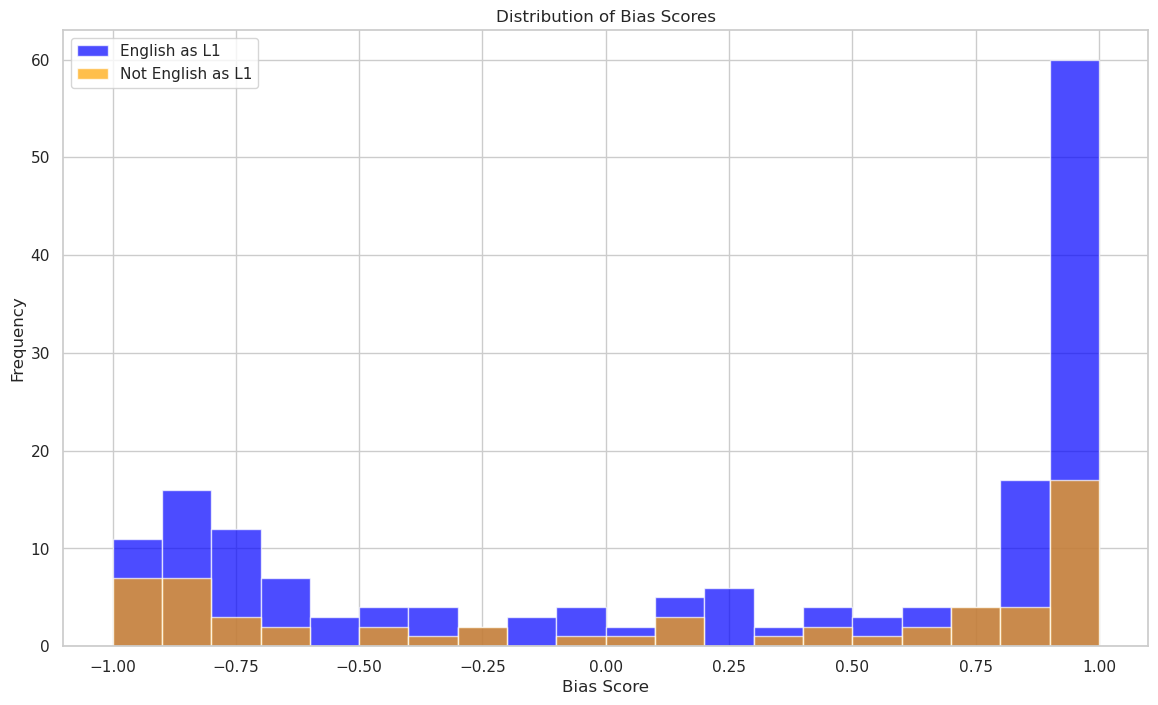

In [31]:
import matplotlib.pyplot as plt

# Define colors based on L1 (First Language)
colors = data['L1'].apply(lambda x: 'blue' if x == 'English' else 'orange')

# Plotting Histogram
plt.figure(figsize=(14, 8))

# If you want to color the histogram based on 'L1', you can split the data into two histograms
plt.hist(data[data['L1'] == 'English']['Bias Score'], bins=20, color='blue', alpha=0.7, label='English as L1')
plt.hist(data[data['L1'] != 'English']['Bias Score'], bins=20, color='orange', alpha=0.7, label='Not English as L1')

# Titles and labels
plt.title('Distribution of Bias Scores')
plt.xlabel('Bias Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [ ]:
df = data.dropna(subset=['L1'])

# Assign colors based on whether English is the first language or not
colors = df['L1'].apply(lambda x: 'blue' if x == 'English' else 'orange')

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df.index, df['Bias Score'], color=colors)
plt.title('Bias Score for Each Participant')
plt.xlabel('Participant Index')
plt.ylabel('Bias Score')
plt.xticks(df.index, df['Subject'], rotation='vertical')
plt.show()

In [ ]:
data['Bias Score'].max()

## t-tests

In [ ]:
from scipy.stats import ttest_ind
english_first = data[data['L1'] == "English"]['Bias Score']
other_first = data[data['L1'] != "English"]['Bias Score']

t_stat, p_value = ttest_ind(english_first, other_first)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

mean_english_first = english_first.mean()
mean_other_first = other_first.mean()
print(mean_english_first)
print(mean_other_first)

monolingual = data[data['LangClassification'] == "Monolingual"]['Bias Score']
bilingual = data[data['LangClassification'] != "Monolingual"]['Bias Score']

t_stat, p_value = ttest_ind(monolingual, bilingual)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")